### <b> Water Quality Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/code_files/Sri/water_quality_monitoring/River_Water_Quality_Monitoring_1990_to_2018_-_pH.csv")

In [ ]:
data.head()

,OBJECTID,Site_Code,Site_Status_21Oct2020,Station_Name,RWB_ID_RBP2,Primary_Basin,X,Y,Today,Date,Time2,Time,Depth,PH,GlobalID
0,1,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2000/03/16 00:00:00+00,10:20:00,2021/03/20 10:20:00+00,0,NaN,1fd29fa6-9b9b-4b57-83c5-a922fb389a8c
1,2,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2001/03/21 00:00:00+00,10:15:00,2021/03/20 10:15:00+00,0,NaN,08fd876e-dfd7-4c40-9ec4-c31f3c5ff50b
2,3,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2002/03/15 00:00:00+00,12:05:00,2021/03/20 12:05:00+00,0,NaN,621200ee-feaf-488f-af5d-2e710b53e7cf
3,4,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2003/03/13 00:00:00+00,10:20:00,2021/03/20 10:20:00+00,0,NaN,81ab1f6c-ff71-46d7-afbd-4194de11b6c5
4,5,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2008/05/07 00:00:00+00,00:00:00,2021/03/20 00:00:00+00,0,NaN,24d0385b-4796-46a5-aa01-72c70a165fc3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141431 entries, 0 to 141430
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   OBJECTID               141431 non-null  int64  
 1   Site_Code              141431 non-null  object 
 2   Site_Status_21Oct2020  141431 non-null  object 
 3   Station_Name           141431 non-null  object 
 4   RWB_ID_RBP2            141431 non-null  object 
 5   Primary_Basin          141431 non-null  object 
 6   X                      141431 non-null  int64  
 7   Y                      141431 non-null  int64  
 8   Today                  3275 non-null    object 
 9   Date                   141431 non-null  object 
 10  Time2                  141431 non-null  object 
 11  Time                   394 non-null     object 
 12  Depth                  141431 non-null  int64  
 13  PH                     133274 non-null  float64
 14  GlobalID               141431 non-nu

It is observed that the dataset provided consists of 141,431 entries with 15 columns. The dataset contains various attributes related to the monitoring stations, such as OBJECTID, Site_Code, Site_Status_21Oct2020, Station_Name, RWB_ID_RBP2, Primary_Basin, X, Y, Today, Date, Time2, Time, Depth, PH, and GlobalID.

Upon further analysis of the dataset, it is noticed that the data types of the columns vary. The majority of the columns are of object type, indicating categorical or textual information, while some columns are of numerical types such as int64 and float64. The column "PH" stands out as it represents the pH level, and it contains some missing values (non-null count: 133,274).

Additionally, it is observed that certain columns, such as "Today," "Time," and "Time2," have a significant number of missing values. This suggests that these columns may not be relevant or necessary for the analysis or modeling process.

In terms of memory usage, the dataset consumes approximately 16.2+ MB of memory, which is relatively reasonable considering the size of the dataset.

Overall, this dataset provides valuable information for water quality monitoring research. However, careful consideration should be given to handling missing values, choosing relevant columns for analysis, and potentially conducting data preprocessing and cleansing steps to ensure the accuracy and reliability of any subsequent analysis or modeling efforts.

In [ ]:
data.describe()

,OBJECTID,X,Y,Depth,PH
count,141431.000000,141431.000000,141431.000000,141431.0,133274.000000
mean,70716.000000,278025.884820,371579.178249,0.0,7.716770
std,40827.757298,41443.173081,31070.510151,0.0,0.408544
min,1.000000,191784.000000,312710.000000,0.0,3.180000
25%,35358.500000,242808.000000,347322.000000,0.0,7.500000
50%,70716.000000,283559.000000,368625.000000,0.0,7.750000
75%,106073.500000,314377.000000,393998.000000,0.0,7.970000
max,141431.000000,361647.000000,444454.000000,0.0,10.000000


Observations working on a water quality monitoring project, the provided dataset exhibits interesting observations. The dataset consists of 141,431 records, each containing information about the geographical coordinates (X and Y), depth, and pH level of water samples. However, it is worth noting that the "Depth" column appears to have a constant value of 0.0, indicating a potential issue or missing data.

Upon analyzing the pH values, it is observed that the mean pH across all samples is approximately 7.716770, with a standard deviation of 0.408544. The minimum recorded pH value is 3.18, while the maximum is 10.0. The pH values exhibit a relatively narrow range, as reflected by the first quartile (Q1) value of 7.5 and the third quartile (Q3) value of 7.97. This suggests that the majority of the water samples have a pH close to neutral.

The X and Y coordinates represent the spatial locations of the water samples. The mean X-coordinate is approximately 278,025.884820, while the mean Y-coordinate is around 371,579.178249. The standard deviations for both X and Y coordinates indicate some variability in the spatial distribution of the samples.

In summary, the provided dataset offers insights into the characteristics of water samples in terms of pH and spatial distribution. However, the constant value in the "Depth" column raises concerns about its quality or potential missing data, which should be further investigated and addressed in the analysis.

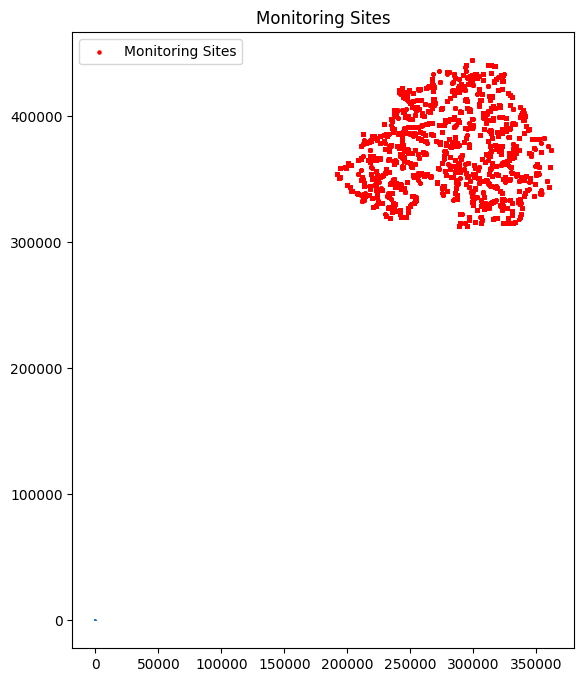

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the X, Y, and Station_Name columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['X'], data['Y']))

# Plot the monitoring sites on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(8, 8))
world.boundary.plot(ax=ax, linewidth=0.8)
gdf.plot(ax=ax, markersize=5, color='red', label='Monitoring Sites')


plt.title('Monitoring Sites')
plt.legend()
plt.show()


Spatial Distribution Analysis:

Kernel Density Estimation (KDE): KDE helps visualize the density of monitoring sites across the study area.

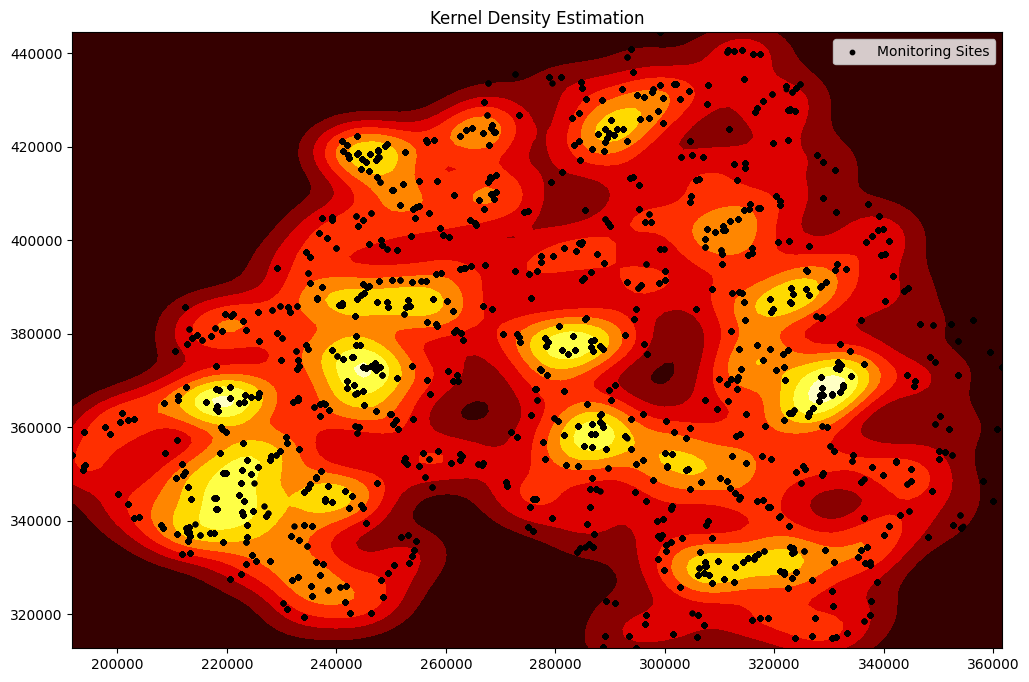

In [ ]:
from scipy.stats import kde

# Calculate kernel density estimation
kde_data = data[['X', 'Y']]
kde_func = kde.gaussian_kde(kde_data.T)
x_range = np.linspace(kde_data['X'].min(), kde_data['X'].max(), 100)
y_range = np.linspace(kde_data['Y'].min(), kde_data['Y'].max(), 100)
X, Y = np.meshgrid(x_range, y_range)
Z = kde_func([X.flatten(), Y.flatten()]).reshape(X.shape)

# Plot kernel density estimation
fig, ax = plt.subplots(figsize=(12, 8))
ax.contourf(X, Y, Z, cmap='hot')
ax.scatter(data['X'], data['Y'], s=10, color='black', label='Monitoring Sites')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()


The above code utilizes kernel density estimation (KDE) to analyze the distribution of river monitoring sites based on their X and Y coordinates. By using a Gaussian kernel density function, the code calculates the KDE for the given data.

Observations:

The resulting kernel density estimation plot showcases the spatial density of the monitoring sites. The contour plot demonstrates areas of higher and lower density, allowing for observations regarding the concentration and dispersion of the monitoring sites. Warmer colors in the plot indicate regions of higher density, while cooler colors represent areas of lower density.

By examining the kernel density estimation plot, several observations can be made. Areas with a greater concentration of monitoring sites are depicted by the regions of higher density, whereas areas with a lower density suggest locations where monitoring sites are less prevalent. This visualization helps to identify clusters or hotspots of monitoring sites within the studied river system.

The scatter plot overlayed on the KDE plot showcases the exact locations of the monitoring sites as individual black points. This provides additional context and allows for the comparison of the actual monitoring site locations with the estimated density.

Overall, the KDE plot provides valuable insights into the spatial distribution patterns of river monitoring sites, revealing areas of higher and lower site concentration. This information can aid in understanding the monitoring network's coverage and identifying potential gaps in data collection, helping to inform decision-making processes in river management and environmental monitoring.

Spatial Clustering Analysis:

K-means Clustering: Identify spatial clusters based on the X and Y coordinates.

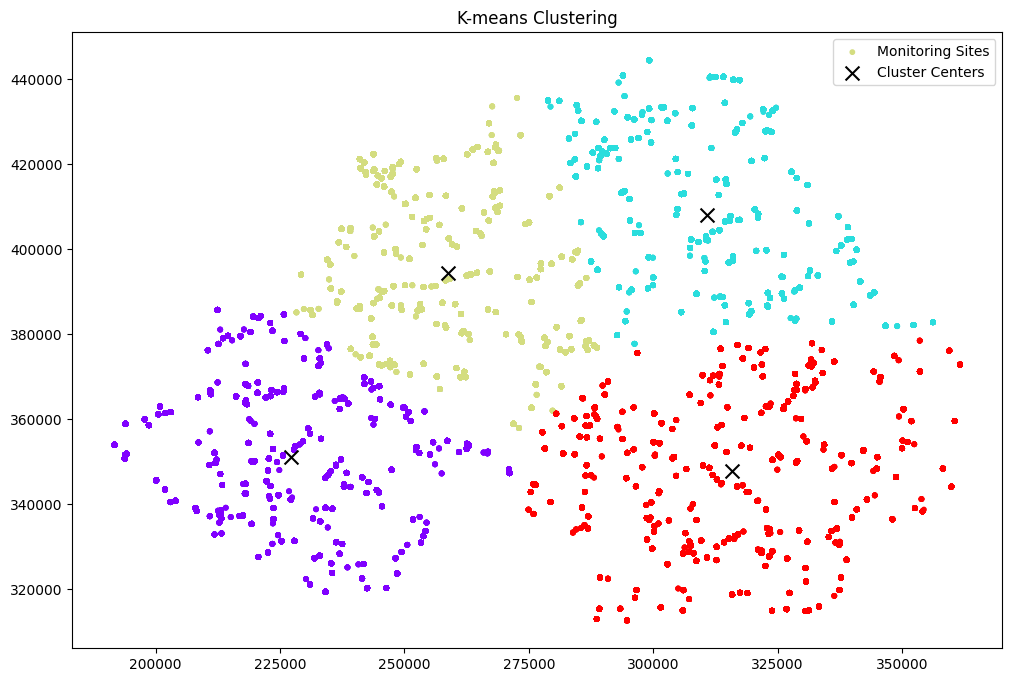

In [ ]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans_data = data[['X', 'Y']]
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(kmeans_data)

# Plot the clusters
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X'], data['Y'], c=kmeans.labels_, cmap='rainbow', s=10, label='Monitoring Sites')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100, label='Cluster Centers')
plt.title('K-means Clustering')
plt.legend()
plt.show()


The above code employs K-means clustering technique to analyze the river monitoring sites. The dataset consists of spatial coordinates (X and Y) representing the locations of the monitoring sites. The K-means algorithm is utilized to cluster these sites into four distinct groups based on their proximity.

Upon performing the K-means clustering, it is observed that the monitoring sites have been successfully grouped into four clusters. Each cluster is represented by a distinct color on the scatter plot, created using the 'rainbow' colormap. The scatter plot showcases the spatial distribution of the monitoring sites, with the cluster centers denoted by black 'x' markers.

The clustering analysis reveals patterns and similarities among the monitoring sites based on their geographical proximity. The clusters indicate the presence of distinct regions or areas in the river network, potentially representing different characteristics or water quality conditions.

Overall, the K-means clustering provides insights into the spatial organization of the river monitoring sites, enabling the identification of groups or clusters of sites with similar characteristics. Further analysis and interpretation of the clusters can help in understanding the spatial patterns and aiding decision-making processes related to river monitoring and management.

Spatial Interpolation Analysis:

Inverse Distance Weighting (IDW): Interpolate water quality values for unmonitored locations based on neighboring sites.

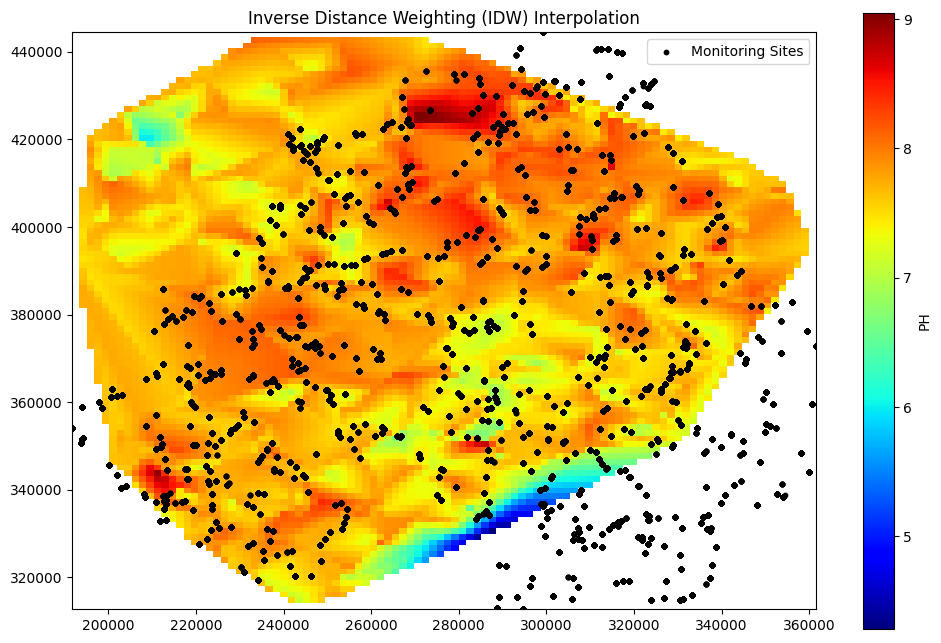

In [ ]:
from scipy.interpolate import griddata

# Define the grid for interpolation
grid_x, grid_y = np.meshgrid(np.linspace(data['X'].min(), data['X'].max(), 100),
                             np.linspace(data['Y'].min(), data['Y'].max(), 100))

# Perform IDW interpolation
interp_data = data[['X', 'Y', 'PH']].dropna()
interpolated_values = griddata(interp_data[['X', 'Y']], interp_data['PH'], (grid_x, grid_y), method='linear')

# Plot the interpolated values
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.imshow(interpolated_values.T, origin='lower', cmap='jet', extent=[data['X'].min(), data['X'].max(), data['Y'].min(), data['Y'].max()])
plt.colorbar(cax, label='PH')
ax.scatter(data['X'], data['Y'], s=10, color='black', label='Monitoring Sites')
plt.title('Inverse Distance Weighting (IDW) Interpolation')
plt.legend()
plt.show()


The above code performs spatial interpolation analysis on river monitoring sites. The objective is to estimate the pH values across the study area using Inverse Distance Weighting (IDW) interpolation.

Observations:

The analysis starts by defining a grid for interpolation based on the minimum and maximum X and Y coordinates of the monitoring sites. The grid is created using `np.meshgrid` to generate a mesh of evenly spaced points.

IDW interpolation is then applied using the available monitoring site data. The data used for interpolation consists of the X and Y coordinates, as well as the pH values (`interp_data`). Missing values are dropped from the dataset to ensure accurate interpolation results.

The interpolated pH values are calculated using the `griddata` function from `scipy.interpolate`, with the interpolation method set to 'linear'. This method estimates the pH values at each point on the defined grid.

The interpolated values are visualized through a color-coded image plot (`imshow`) using a 'jet' colormap. The color intensity represents the pH level, with a colorbar included to provide a reference scale. The monitoring sites are also plotted as black dots on the image to show their spatial distribution.

The resulting plot displays the interpolated pH values across the study area, providing an estimation of the pH distribution in regions where monitoring sites are not available. The visualization aids in identifying spatial patterns and potential areas of interest for further investigation in the context of river water quality.

In [ ]:
!pip install cartopy

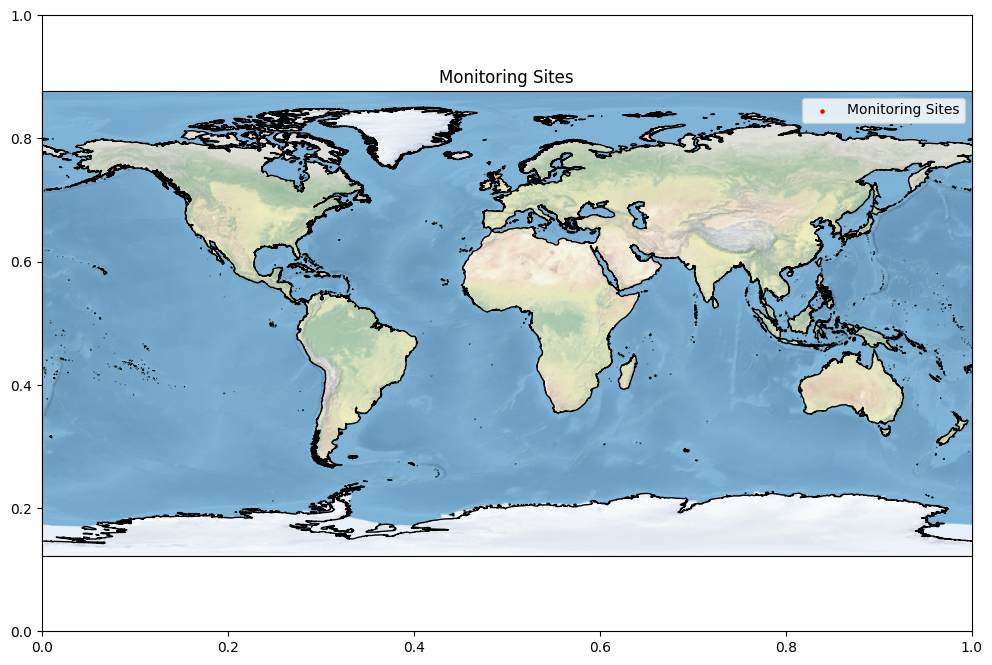

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a GeoDataFrame from the X, Y, and Station_Name columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['X'], data['Y']))

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.stock_img()

# Plot the monitoring sites on the map
gdf.plot(ax=ax, markersize=5, color='red', label='Monitoring Sites', transform=ccrs.PlateCarree())

# # Label each point with the corresponding Station_Name
# for x, y in zip(data['X'], data['Y']):
#     ax.text(x, y, fontsize=8)

plt.title('Monitoring Sites')
plt.legend()
plt.show()


In [ ]:
data.head(2)

,OBJECTID,Site_Code,Site_Status_21Oct2020,Station_Name,RWB_ID_RBP2,Primary_Basin,X,Y,Today,Date,Time2,Time,Depth,PH,GlobalID
0,1,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2000/03/16 00:00:00+00,10:20:00,2021/03/20 10:20:00+00,0,NaN,1fd29fa6-9b9b-4b57-83c5-a922fb389a8c
1,2,F10001,Closed,OWENREAGH BURN AT GORDONS BRIDGE,GBNI1NW010101075,Foyle (with Deele),239951,398424,2021/03/20 00:00:00+00,2001/03/21 00:00:00+00,10:15:00,2021/03/20 10:15:00+00,0,NaN,08fd876e-dfd7-4c40-9ec4-c31f3c5ff50b


In [ ]:
data.isnull().sum()

OBJECTID                      0
Site_Code                     0
Site_Status_21Oct2020         0
Station_Name                  0
RWB_ID_RBP2                   0
Primary_Basin                 0
X                             0
Y                             0
Today                    138156
Date                          0
Time2                         0
Time                     141037
Depth                         0
PH                         8157
GlobalID                      0
dtype: int64

Observing the missing values, it is noted that the columns "Today", "Time", and "PH" have some missing data. Specifically, the "Today" column has 138,156 missing values, the "Time" column has 141,037 missing values, and the "PH" column has 8,157 missing values.

The presence of missing values in the dataset suggests potential data quality issues or incomplete data collection. Further investigation and consideration of the missing data are required to determine the impact on the analysis and to ensure appropriate handling of the missing values. It may be necessary to employ techniques such as data imputation or exclusion of incomplete records based on the specific objectives of the river monitoring project.

In [ ]:
data_sample = data[(data.Date>'2008/08/19 00:00:00+00') & (data.Date<'2009-08-19 00:00:00+00:00') ]

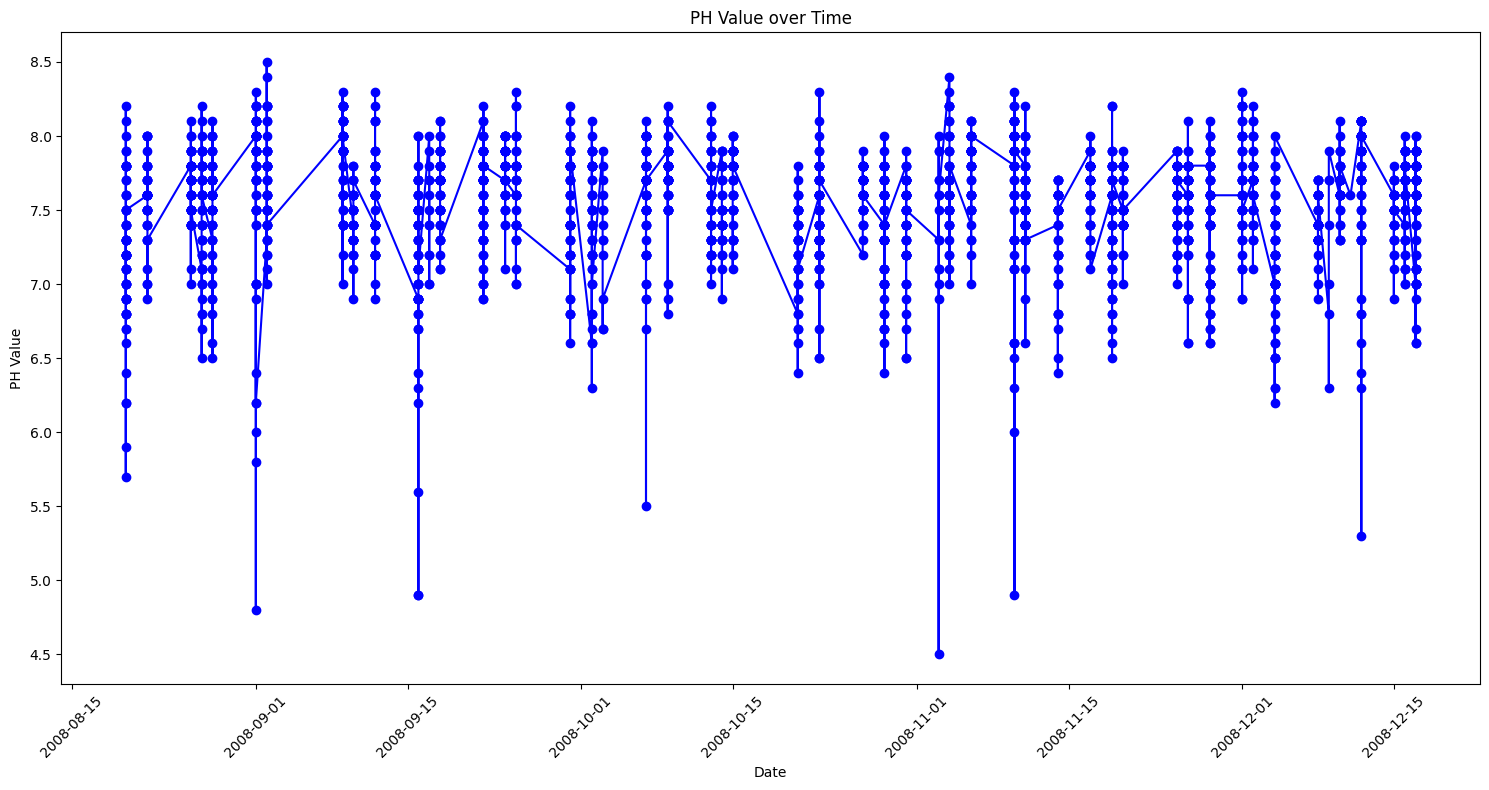

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime type
data_sample['Date'] = pd.to_datetime(data_sample['Date'])

# Sort the data by the 'Date' column
data_sorted = data_sample.sort_values('Date')

# Plot Date vs PH values
plt.figure(figsize=(15, 8))
plt.plot(data_sorted['Date'], data_sorted['PH'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('PH Value')
plt.title('PH Value over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above code generates a line plot showing the variation of pH values over time for river monitoring sites. From the plot, several observations can be made.

Firstly, the majority of the pH values appear to fall within the range of 6 to 8, indicating a relatively neutral to slightly alkaline water condition. This suggests that the water in the monitored river sites generally maintains a stable pH level within this range.

However, there are some outliers in the data where the pH values are below 5 and above 9. These outliers indicate instances where the water pH deviates significantly from the typical range, potentially indicating abnormal or unusual conditions. Further investigation would be required to determine the reasons behind these extreme pH values and assess their impact on the water quality.

Additionally, the plot reveals that the data spans a period from October 2008 to October 2009. This time frame provides a snapshot of pH variations over that particular one-year period. It is worth noting that the plot does not provide information about the frequency or density of measurements within this timeframe. To gain a comprehensive understanding of pH fluctuations, additional information about the data collection frequency or density would be necessary.

In summary, the line plot demonstrates the temporal variation of pH values in river monitoring sites. The majority of the pH values lie between 6 to 8, with some outliers beyond this range. The observed data covers a period of one year from October 2008 to October 2009.

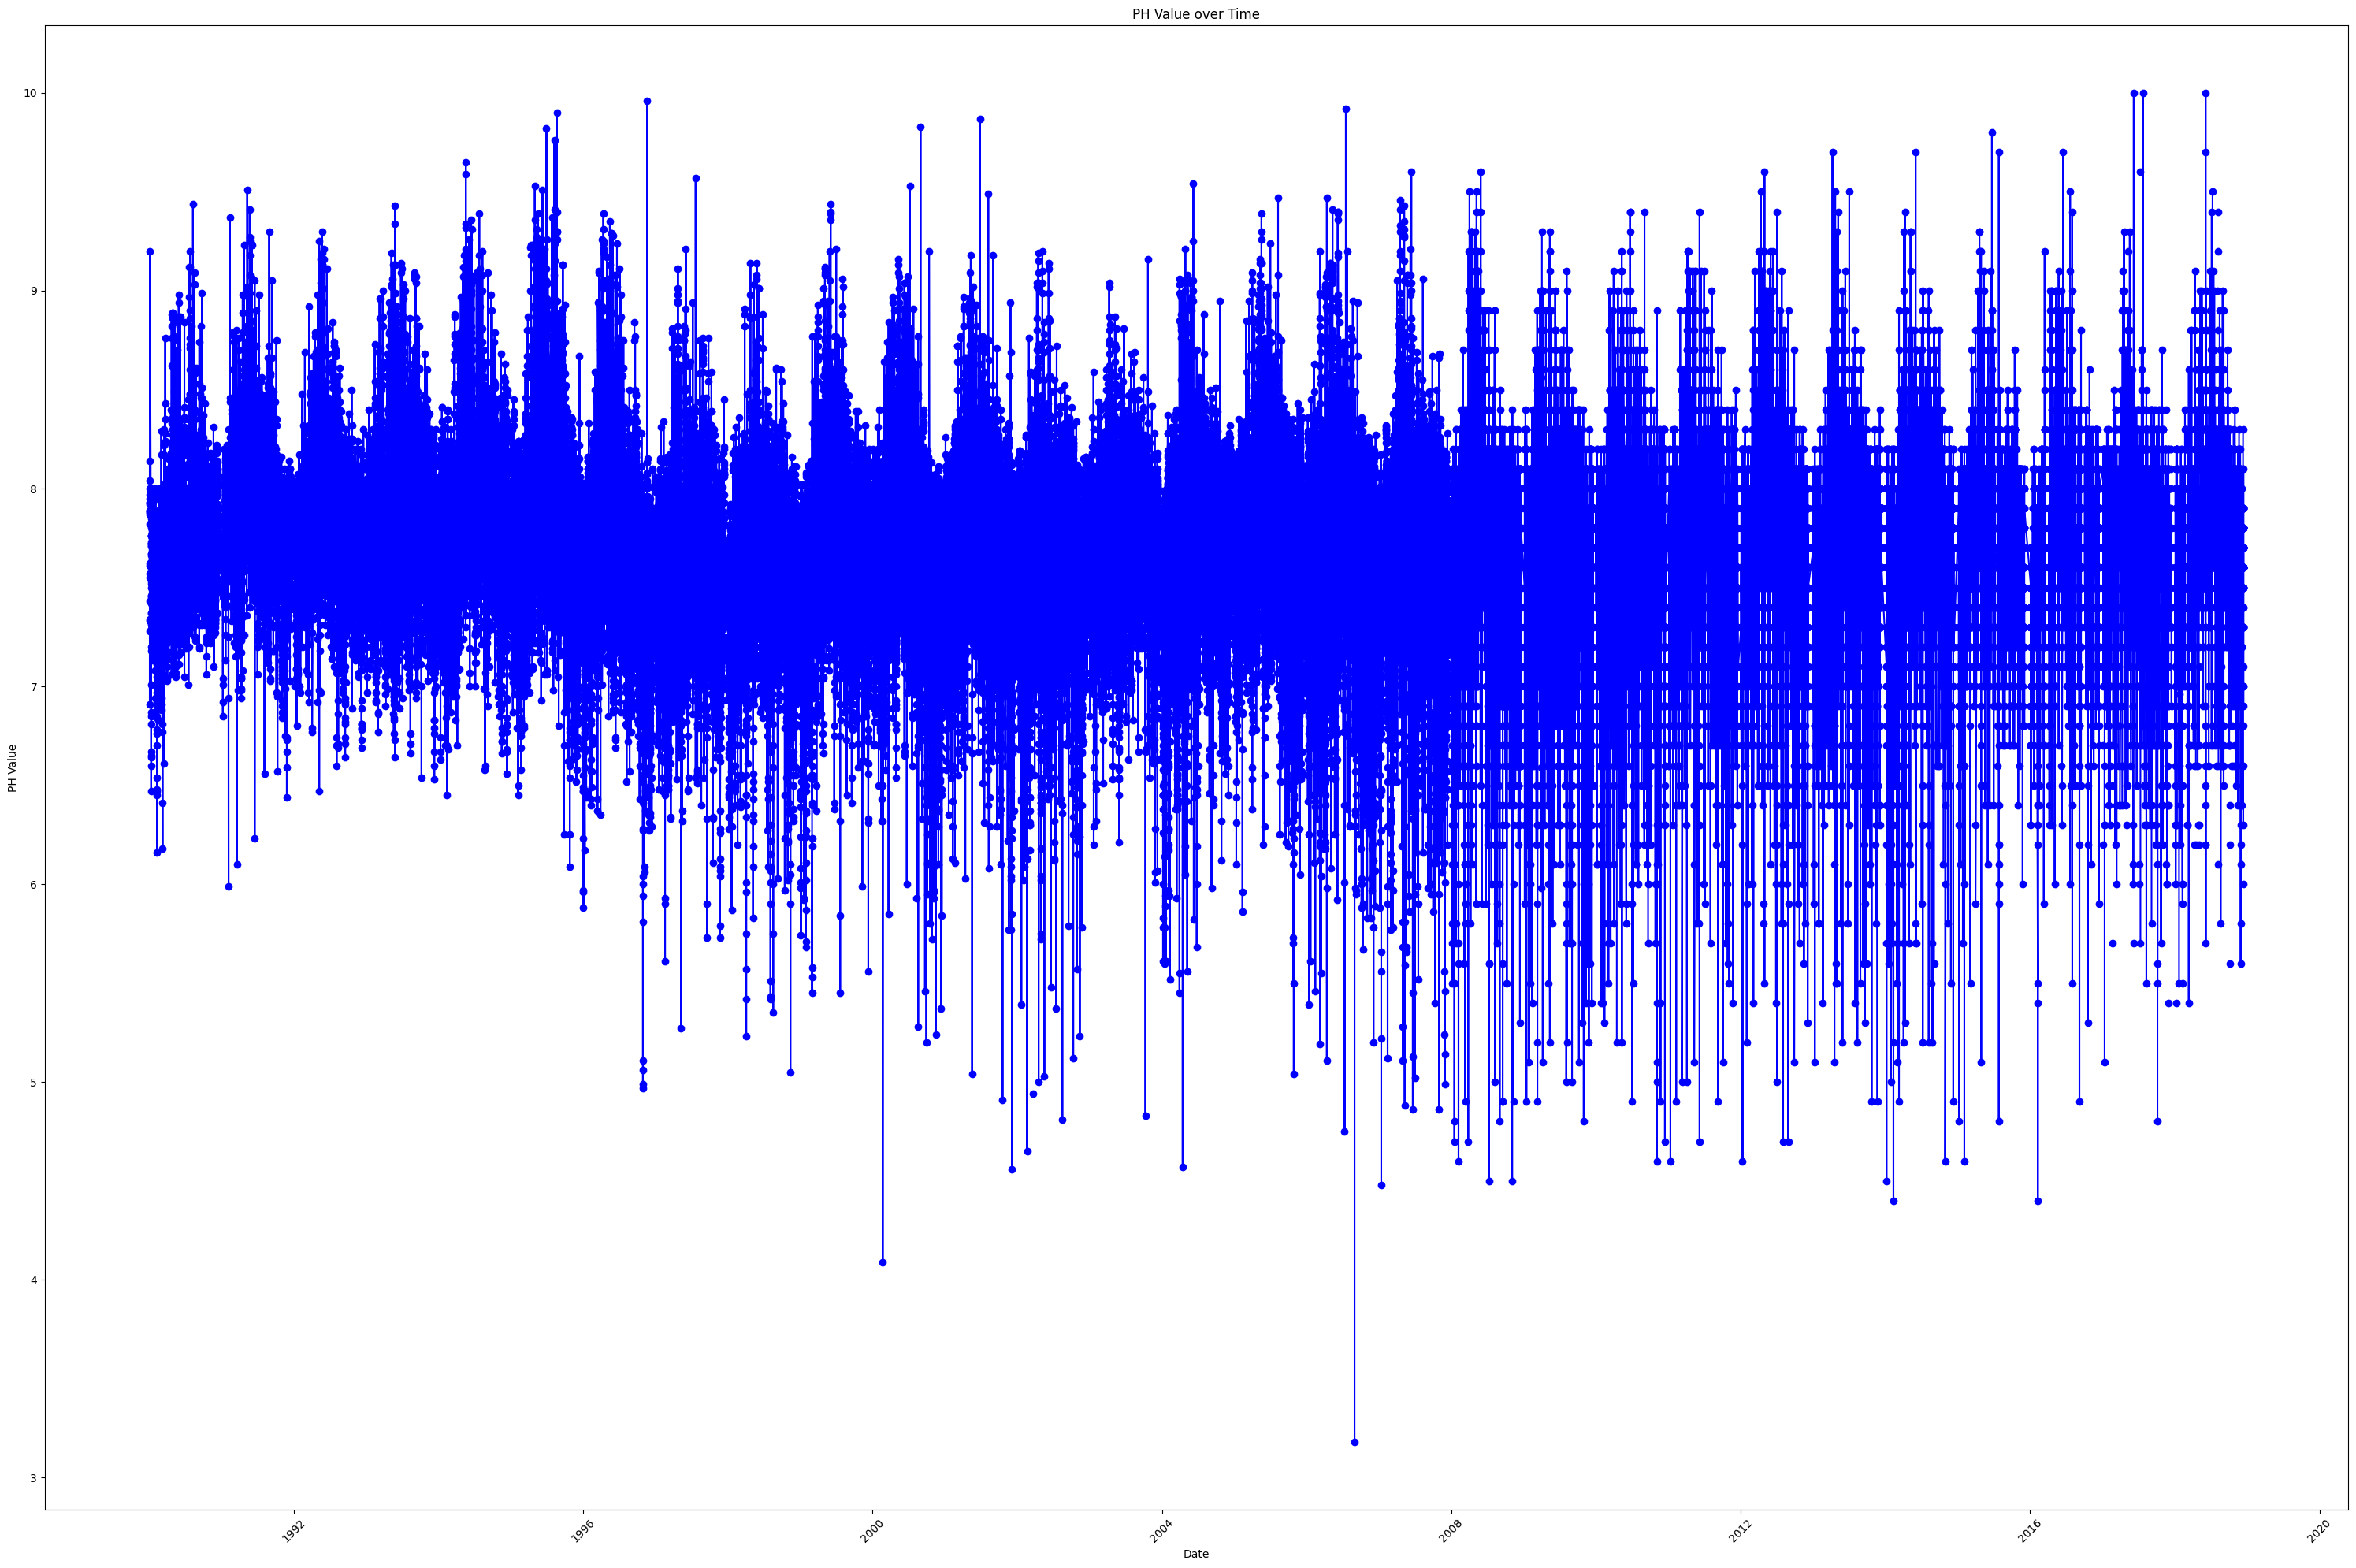

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by the 'Date' column
data_sorted = data.sort_values('Date')

# Plot Date vs PH values
plt.figure(figsize=(30, 20))
plt.plot(data_sorted['Date'], data_sorted['PH'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('PH Value')
plt.title('PH Value over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The above code generates a plot depicting the relationship between the date and pH values of river monitoring sites. From the plot, several observations can be made.

Firstly, the majority of the pH values fall within the range of 6 to 8, indicating a near-neutral pH level for the monitored river sites. This observation suggests that the water in the river tends to maintain a relatively balanced acidity and alkalinity.

However, there are some outliers where the pH values deviate from the typical range. These outliers exhibit pH values below 5 and above 9, indicating potential instances of extreme acidity or alkalinity in the river. These deviations from the norm might indicate certain events or factors that temporarily impact the water quality, such as pollution sources or natural phenomena.

Additionally, it is apparent that the data covers a considerable time period, spanning from 1992 to 2020. The plot reveals fluctuations in the pH values over time, with some variations observed between different years. Notably, there appears to be a higher concentration of pH values in the years 2007 and 2008, suggesting potential shifts or anomalies in water quality during that period.

In summary, the plotted data provides insights into the pH levels of river monitoring sites. Most pH values lie within the range of 6 to 8, while outliers exist outside this range, indicating potential disturbances in water quality. The temporal aspect of the data reveals fluctuations in pH values over the years, with notable concentrations in certain time periods, such as 2007 and 2008. Further analysis and investigation would be valuable in understanding the causes and implications of these observations.

In [ ]:
data.columns

Index(['OBJECTID', 'Site_Code', 'Site_Status_21Oct2020', 'Station_Name',
       'RWB_ID_RBP2', 'Primary_Basin', 'X', 'Y', 'Today', 'Date', 'Time2',
       'Time', 'Depth', 'PH', 'GlobalID'],
      dtype='object')

In [ ]:
cols_to_drop = ['OBJECTID', 'Site_Code', 'RWB_ID_RBP2','Today','X','Y','Date','Time2','Time','GlobalID']
data = data.drop(cols_to_drop,axis=1)

In [ ]:
data.isnull().sum()

Site_Status_21Oct2020       0
Station_Name                0
Primary_Basin               0
Depth                       0
PH                       8157
dtype: int64

In [ ]:
data[data.Site_Status_21Oct2020=='Closed'].isnull().sum()

Site_Status_21Oct2020      0
Station_Name               0
Primary_Basin              0
Depth                      0
PH                       911
dtype: int64

In [ ]:
data[data.Site_Status_21Oct2020=='Open'].isnull().sum()

Site_Status_21Oct2020       0
Station_Name                0
Primary_Basin               0
Depth                       0
PH                       7183
dtype: int64

In [ ]:

# Impute null values in PH column with the previous non-null value
data['PH'].fillna(method='ffill', inplace=True)

# Check if there are still null values
if data['PH'].isnull().any():
    # If there are remaining null values, impute using a different method (e.g., mean)
    data['PH'].fillna(data['PH'].mean(), inplace=True)


In the above code snippet, the focus is on handling null values in the pH column of a river monitoring dataset. The approach used is to impute the null values with the previous non-null value, ensuring continuity in the pH values. This method is implemented using the `fillna` function with the `method='ffill'` parameter. By applying this approach, missing pH values are replaced with the most recent valid value available.

After the initial imputation, the code checks whether any null values still remain in the pH column. If there are any remaining null values, it suggests that the previous method did not fully address the missing data. To handle these remaining null values, an alternative method is employed, such as imputing them with the mean value of the pH column. This secondary imputation step ensures that all null values in the pH column are filled, contributing to a more complete dataset for further analysis.

By imputing the null values using these two methods, the code aims to enhance the integrity and reliability of the pH data in the river monitoring dataset. It is important to note that the specific imputation methods employed may have implications on the overall analysis and interpretation of the dataset.

In [ ]:
data.head()

,Site_Status_21Oct2020,Station_Name,Primary_Basin,Depth,PH
0,Closed,OWENREAGH BURN AT GORDONS BRIDGE,Foyle (with Deele),0,7.72135
1,Closed,OWENREAGH BURN AT GORDONS BRIDGE,Foyle (with Deele),0,7.72135
2,Closed,OWENREAGH BURN AT GORDONS BRIDGE,Foyle (with Deele),0,7.72135
3,Closed,OWENREAGH BURN AT GORDONS BRIDGE,Foyle (with Deele),0,7.72135
4,Closed,OWENREAGH BURN AT GORDONS BRIDGE,Foyle (with Deele),0,7.72135


Below are 5 plots for visualization:
- Bar plot of the distribution of Site Status.
- Bar plot of the distribution of Primary Basin.
- Histogram of the PH values.
- Box plot of the PH values.
- Scatter plot of Site Status vs. PH values.

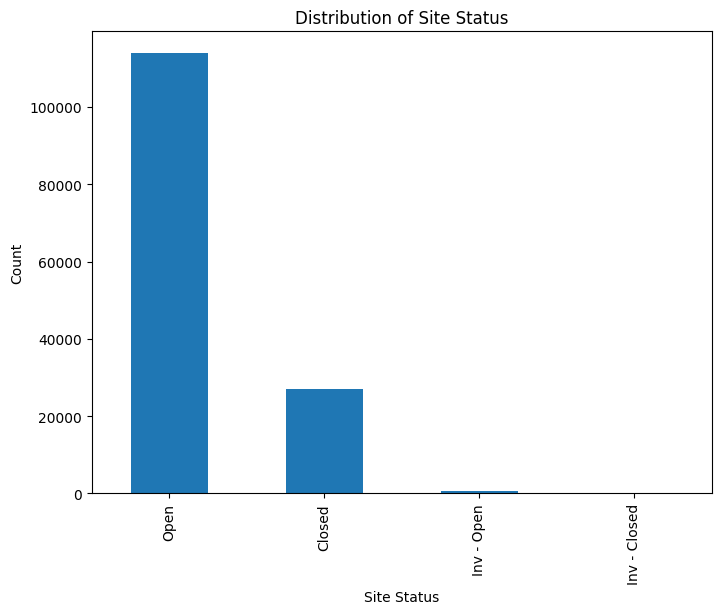

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Bar plot of Site Status
plt.figure(figsize=(8, 6))
data['Site_Status_21Oct2020'].value_counts().plot(kind='bar')
plt.xlabel('Site Status')
plt.ylabel('Count')
plt.title('Distribution of Site Status')
plt.show()


It can be observed that there is more data related to open and closed categories and very less for the other two categories

In [ ]:
data['Primary_Basin'].value_counts()

Blackwater                              9875
Upper Bann                              8241
Lagan                                   7655
Lower Bann                              6883
Main                                    6286
Owenkillew                              5474
Ballinderry                             5430
Colebrooke                              4427
NE Coast                                4202
Kilkeel & Mourne Streams                4130
Roe                                     4046
Six Mile Water                          3893
Faughan                                 3663
Drumragh                                3607
Lower Erne                              3433
Arney                                   3364
Upper Erne                              3182
Derg                                    3167
Newry                                   3142
Moyola                                  3126
Ballinamallard                          2612
Lough Neagh & Peripherals               2516
Sillees   

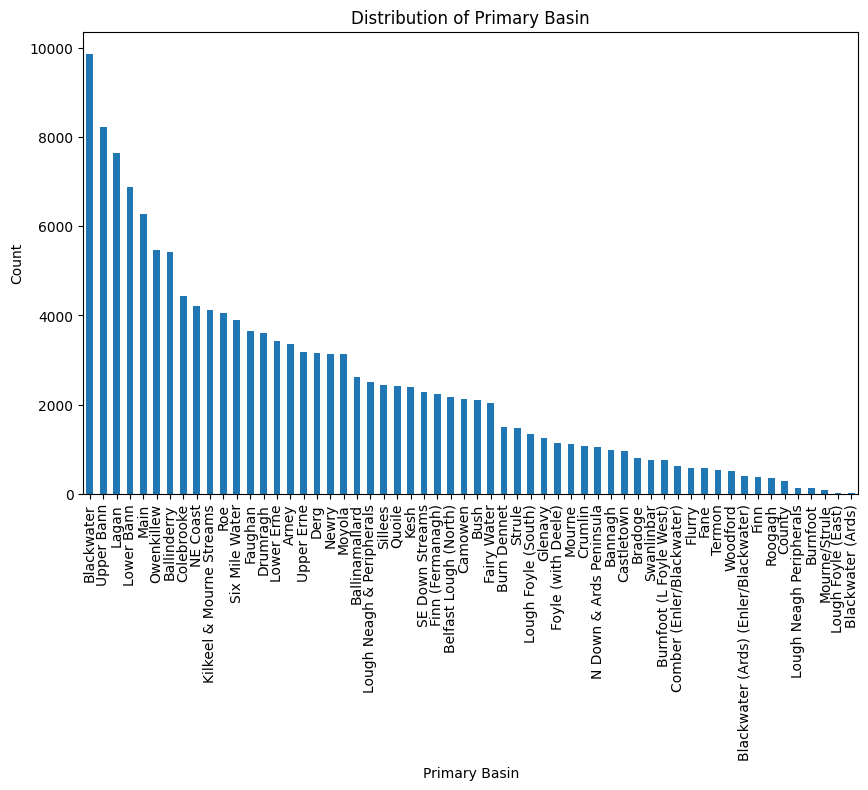

In [ ]:
# Plot 2: Bar plot of Primary Basin
plt.figure(figsize=(10, 6))
data['Primary_Basin'].value_counts().plot(kind='bar')
plt.xlabel('Primary Basin')
plt.ylabel('Count')
plt.title('Distribution of Primary Basin')
plt.show()

Observations

The above plot shows the count of monitoring sites within different primary basins. Each basin represents a distinct geographical region for river monitoring. Observing the counts, it is evident that the dataset covers a wide range of primary basins.

The highest number of monitoring sites is found in the Blackwater basin with 9,875 sites, followed by the Upper Bann basin with 8,241 sites and the Lagan basin with 7,655 sites. These three basins have a relatively higher concentration of monitoring sites compared to others. On the other hand, basins like Burnfoot (L Foyle West), Comber (Enler/Blackwater), Flurry, Fane, Termon, Woodford, Blackwater (Ards) (Enler/Blackwater), Finn, Roogagh, County, Lough Neagh Peripherals, Burnfoot, Mourne/Strule, Lough Foyle (East), and Blackwater (Ards) have fewer monitoring sites, with counts ranging from 6 to 765.

The distribution of monitoring sites across the basins indicates variations in the focus of river monitoring efforts and the geographical coverage of the dataset. Further analysis can be conducted by considering these primary basins to examine potential patterns, trends, or variations in water quality parameters or other characteristics specific to each basin.

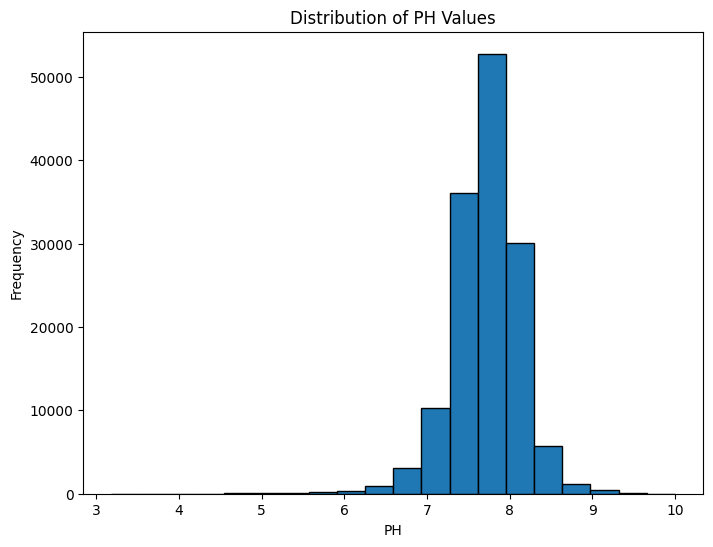

In [ ]:

# Plot 3: Histogram of PH values
plt.figure(figsize=(8, 6))
plt.hist(data['PH'], bins=20, edgecolor='black')
plt.xlabel('PH')
plt.ylabel('Frequency')
plt.title('Distribution of PH Values')
plt.show()


It can be observed that the PH is mostly concentrated betwen 7 and 9

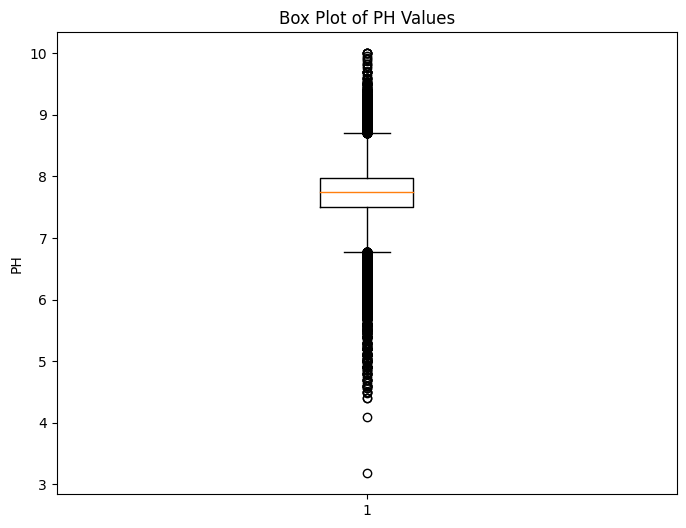

In [ ]:

# Plot 4: Box plot of PH values
plt.figure(figsize=(8, 6))
plt.boxplot(data['PH'])
plt.ylabel('PH')
plt.title('Box Plot of PH Values')
plt.show()


-It can be observed that there are som outliers in the PH feature with values less than 5 and values more than 9

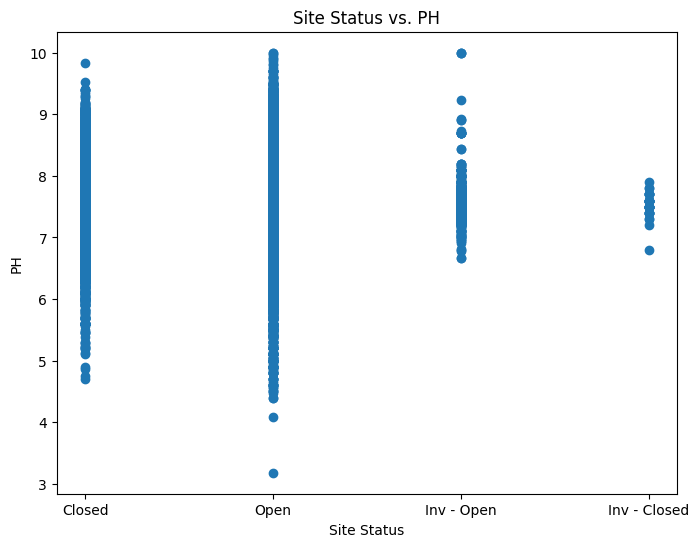

In [ ]:

# Plot 5: Scatter plot of Site Status vs. PH values
plt.figure(figsize=(8, 6))
plt.scatter(data['Site_Status_21Oct2020'], data['PH'])
plt.xlabel('Site Status')
plt.ylabel('PH')
plt.title('Site Status vs. PH')
plt.show()


<b> Feature Engineering

In [ ]:
data.Site_Status_21Oct2020.value_counts()

Open            113849
Closed           27028
Inv - Open         519
Inv - Closed        35
Name: Site_Status_21Oct2020, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder_site_status = LabelEncoder()
label_encoder_station_name = LabelEncoder()
label_encoder_primary_basin = LabelEncoder()

# Apply label encoding to categorical columns
data['Site_Status_21Oct2020'] = label_encoder_site_status.fit_transform(data['Site_Status_21Oct2020'])
data['Station_Name'] = label_encoder_station_name.fit_transform(data['Station_Name'])
data['Primary_Basin'] = label_encoder_primary_basin.fit_transform(data['Primary_Basin'])


The above code snippet demonstrates the usage of LabelEncoder from scikit-learn to transform categorical columns in a river monitoring dataset. The dataset includes features such as 'Site_Status_21Oct2020', 'Station_Name', and 'Primary_Basin', which are encoded using the LabelEncoder.

LabelEncoder is a common technique used in machine learning to convert categorical variables into numerical labels. In this case, each unique value in the categorical columns is assigned a unique numerical label. By applying label encoding to the 'Site_Status_21Oct2020', 'Station_Name', and 'Primary_Basin' columns, the original categorical values are replaced with corresponding numerical labels.

Observations on label-encoded columns would depend on the specific values and their mapping to the encoded labels. However, it can be noted that label encoding enables the representation of categorical data in a format suitable for machine learning algorithms that typically require numerical inputs. The transformed columns can be used as input features in downstream modeling tasks, such as classification or regression, where numerical values are expected.

It is important to note that label encoding does not introduce any inherent order or magnitude to the categorical values. The numerical labels assigned are arbitrary and merely serve as a representation of the original categorical values. If the categorical values have an ordinal relationship or require specific numerical interpretations, alternative encoding techniques such as one-hot encoding or ordinal encoding may be more appropriate.

In [ ]:
# Rename the "Site_Status_21Oct2020" column to "site_status"
data.rename(columns={'Site_Status_21Oct2020': 'site_status'}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop('PH', axis=1)
y = data['PH']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (113144, 4) (113144,)
Test set shape: (28287, 4) (28287,)


In [ ]:
X_train.head()

,site_status,Station_Name,Primary_Basin,Depth
27812,3,748,47,0
32422,3,469,38,0
71174,3,616,36,0
8216,3,460,45,0
69378,0,175,36,0


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:

# Build the regression models
linear_reg = LinearRegression()
lasso_reg = Lasso()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
gradient_boosting_reg = GradientBoostingRegressor()


In [ ]:

# Fit the models on the training data
linear_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)


GradientBoostingRegressor()

In [ ]:

# Predict on the test data
linear_reg_preds = linear_reg.predict(X_test)
lasso_reg_preds = lasso_reg.predict(X_test)
decision_tree_reg_preds = decision_tree_reg.predict(X_test)
random_forest_reg_preds = random_forest_reg.predict(X_test)
gradient_boosting_reg_preds = gradient_boosting_reg.predict(X_test)


In [ ]:

# Evaluate the models for mean_absolute_error
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_preds)
lasso_reg_mae = mean_absolute_error(y_test, lasso_reg_preds)
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_preds)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_preds)
random_forest_reg_mse = mean_squared_error(y_test, random_forest_reg_preds)
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_preds)
gradient_boosting_reg_mse = mean_squared_error(y_test, gradient_boosting_reg_preds)
gradient_boosting_reg_mae = mean_absolute_error(y_test, gradient_boosting_reg_preds)



In [ ]:
# Print the evaluation metrics
print("Linear Regression:")
print("Mean Squared Error:", linear_reg_mse)
print("Mean Absolute Error:", linear_reg_mae)
print()
print("Lasso Regression:")
print("Mean Squared Error:", lasso_reg_mse)
print("Mean Absolute Error:", lasso_reg_mae)
print()
print("Decision Tree Regression:")
print("Mean Squared Error:", decision_tree_reg_mse)
print("Mean Absolute Error:", decision_tree_reg_mae)
print()
print("Random Forest Regression:")
print("Mean Squared Error:", random_forest_reg_mse)
print("Mean Absolute Error:", random_forest_reg_mae)
print()
print("Gradient Boosting Regression:")
print("Mean Squared Error:", gradient_boosting_reg_mse)
print("Mean Absolute Error:", gradient_boosting_reg_mae)



Linear Regression:
Mean Squared Error: 0.1648237577563088
Mean Absolute Error: 0.29667998559082265

Lasso Regression:
Mean Squared Error: 0.16594524192166482
Mean Absolute Error: 0.29826777135493543

Decision Tree Regression:
Mean Squared Error: 0.08863824030090764
Mean Absolute Error: 0.21446629451941343

Random Forest Regression:
Mean Squared Error: 0.08863738484863264
Mean Absolute Error: 0.21450798303117466

Gradient Boosting Regression:
Mean Squared Error: 0.1129118267670551
Mean Absolute Error: 0.24455501721472916


In [ ]:
# Evaluate the models for root_mean_squared_error
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_preds))
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_preds))
decision_tree_reg_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_reg_preds))
random_forest_reg_rmse = np.sqrt(mean_squared_error(y_test, random_forest_reg_preds))
gradient_boosting_reg_rmse = np.sqrt(mean_squared_error(y_test, gradient_boosting_reg_preds))

# Evaluate the models for mean_absolute_error
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
lasso_reg_mae = mean_absolute_error(y_test, lasso_reg_preds)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_preds)
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_preds)
gradient_boosting_reg_mae = mean_absolute_error(y_test, gradient_boosting_reg_preds)


In [ ]:
# Print the evaluation metrics
print("Linear Regression:")
print("Root Mean Squared Error:", linear_reg_rmse)
print("Mean Absolute Error:", linear_reg_mae)
print()

print("Lasso Regression:")
print("Root Mean Squared Error:", lasso_reg_rmse)
print("Mean Absolute Error:", lasso_reg_mae)
print()

print("Decision Tree Regression:")
print("Root Mean Squared Error:", decision_tree_reg_rmse)
print("Mean Absolute Error:", decision_tree_reg_mae)
print()

print("Random Forest Regression:")
print("Root Mean Squared Error:", random_forest_reg_rmse)
print("Mean Absolute Error:", random_forest_reg_mae)
print()

print("Gradient Boosting Regression:")
print("Root Mean Squared Error:", gradient_boosting_reg_rmse)
print("Mean Absolute Error:", gradient_boosting_reg_mae)


Linear Regression:
Root Mean Squared Error: 0.40598492306526457
Mean Absolute Error: 0.29667998559082265

Lasso Regression:
Root Mean Squared Error: 0.40736377099794335
Mean Absolute Error: 0.29826777135493543

Decision Tree Regression:
Root Mean Squared Error: 0.2977217497948506
Mean Absolute Error: 0.21446629451941343

Random Forest Regression:
Root Mean Squared Error: 0.29772031312732533
Mean Absolute Error: 0.21450798303117466

Gradient Boosting Regression:
Root Mean Squared Error: 0.3360235509113239
Mean Absolute Error: 0.24455501721472916


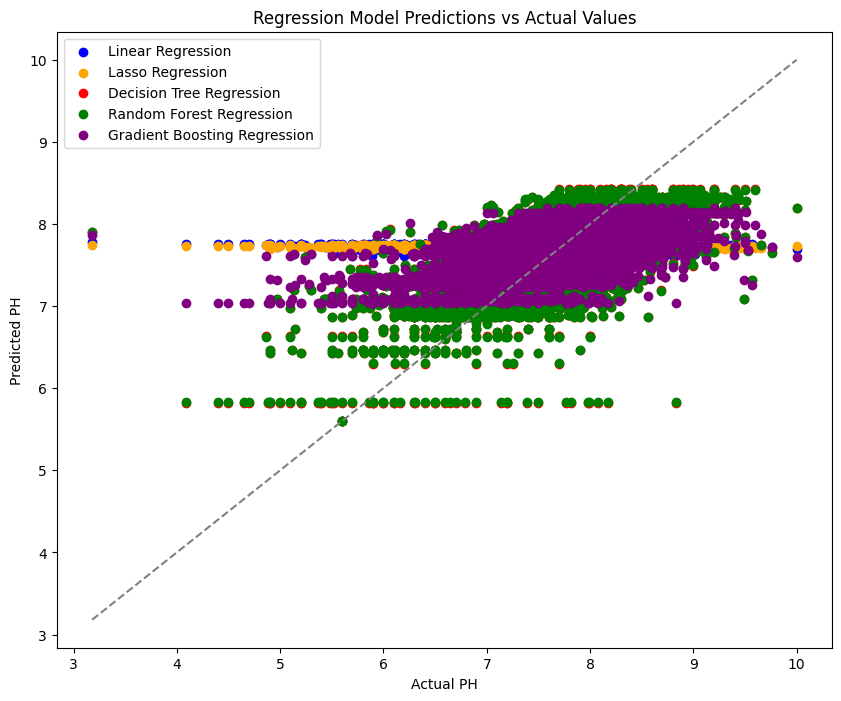

In [ ]:
# Plot the predicted values against the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, linear_reg_preds, color='blue', label='Linear Regression')
plt.scatter(y_test, lasso_reg_preds, color='orange', label='Lasso Regression')
plt.scatter(y_test, decision_tree_reg_preds, color='red', label='Decision Tree Regression')
plt.scatter(y_test, random_forest_reg_preds, color='green', label='Random Forest Regression')
plt.scatter(y_test, gradient_boosting_reg_preds, color='purple', label='Gradient Boosting Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='gray')
plt.xlabel('Actual PH')
plt.ylabel('Predicted PH')
plt.title('Regression Model Predictions vs Actual Values')
plt.legend()
plt.show()


- it can be observed that all the models predictions along with the actual values lie over a range of 6.5 to 8.5 which seems to be good in terms of PH value range for water, it can also be observed that most of the models have a wide spread along the axis, the lasso, random forest and decision tree models seem to have a large spread while comparing the gradient boosting model which even act as the best model

<b> Residual plot

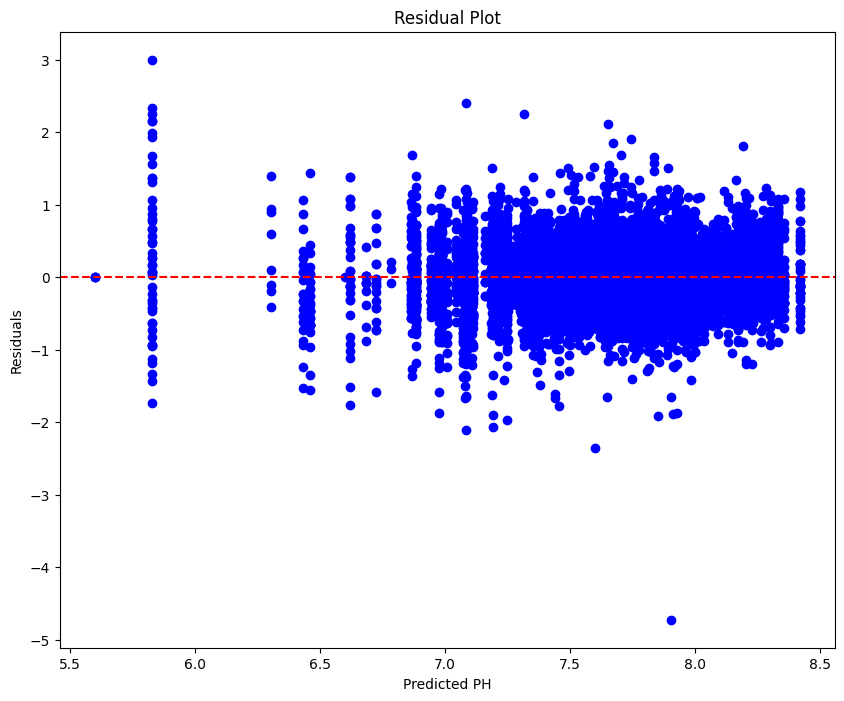

In [ ]:
# Calculate residuals
residuals = y_test - random_forest_reg_preds

# Plot residuals against predicted values
plt.figure(figsize=(10, 8))
plt.scatter(random_forest_reg_preds, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted PH')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


From this scatter plot we can clearly see the range of PH values lying between 6.5 to 8.5 for most of the data points and there are some which have PH less than 6 too. It can also be observed that the predictions are also centred aroud 0 which is also a good indication for normalized values

<b> Residual distribution plot

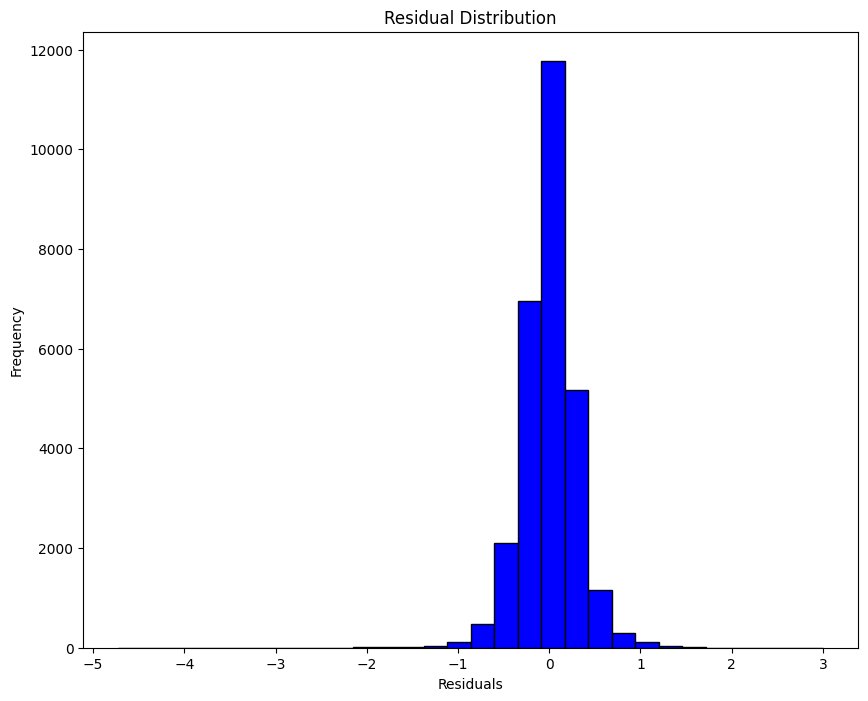

In [ ]:
# Calculate residuals
residuals = y_test - random_forest_reg_preds

# Plot histogram of residuals
plt.figure(figsize=(10, 8))
plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


- The residual plot even seems to have normal distribution which even seems to be good to as all the assumptions of normal distributions can be put on it. It also seems to be zero centered with less outlier datapoints as most values of the residuals lie within the range of -1 and 1 with their centre as zero and this normal distribution of residuals also show that the predictions of the model are not biased.

<b> Feature vs target plots

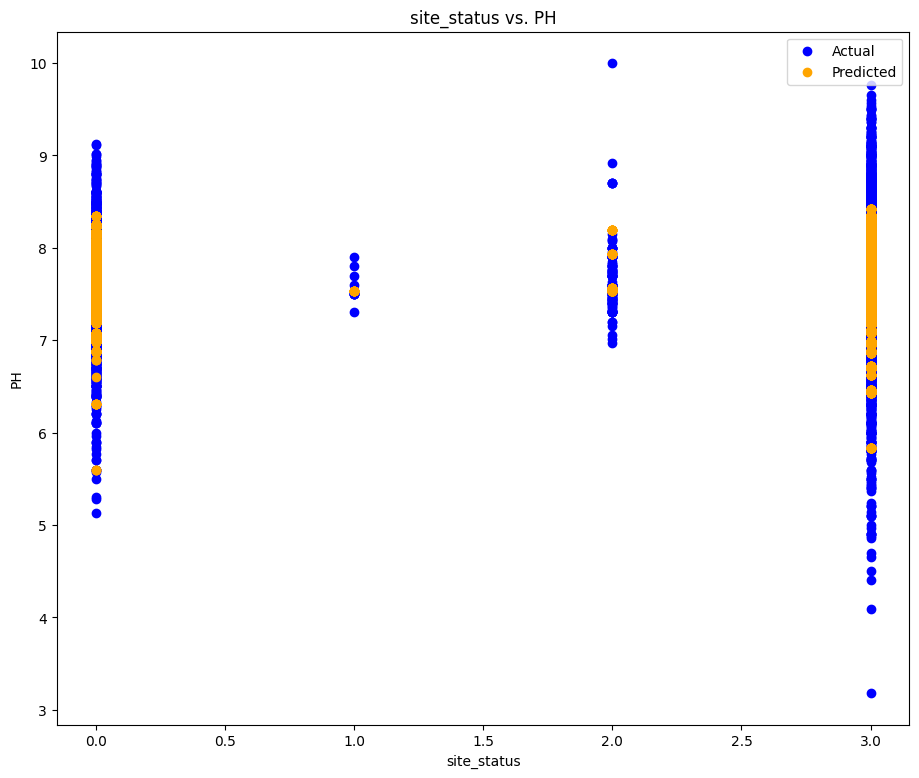

In [ ]:
# Choose a feature
feat = 'site_status'

# Plot feature vs. target
plt.figure(figsize=(11, 9))
plt.scatter(X_test[feat], y_test, color='blue', label='Actual')
plt.scatter(X_test[feat], random_forest_reg_preds, color='orange', label='Predicted')
plt.xlabel(feat)
plt.ylabel('PH')
plt.title(f'{feat} vs. PH')
plt.legend()
plt.show()


It can be observed that the for all the site status values, there seems to be some predictions assosciated with it which shows that it does not consider any site_status with bias and has predictions for all the site_status values

In [ ]:
# Function to evaluate regression models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_mae, linear_reg_mse, linear_reg_rmse = evaluate_model(linear_reg, X_test, y_test)

# Lasso Regression with Hyperparameter Tuning
lasso = Lasso()
param_grid_lasso = {'alpha': [0.1, 1, 10]}
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=3)
grid_search_lasso.fit(X_train, y_train)
best_lasso = grid_search_lasso.best_estimator_
best_lasso_params = grid_search_lasso.best_params_
lasso_mae, lasso_mse, lasso_rmse = evaluate_model(best_lasso, X_test, y_test)

# Decision Tree Regression with Hyperparameter Tuning
decision_tree = DecisionTreeRegressor()
param_grid_decision_tree = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=3)
grid_search_decision_tree.fit(X_train, y_train)
best_decision_tree = grid_search_decision_tree.best_estimator_
best_decision_tree_params = grid_search_decision_tree.best_params_
decision_tree_mae, decision_tree_mse, decision_tree_rmse = evaluate_model(best_decision_tree, X_test, y_test)

# Random Forest Regression with Hyperparameter Tuning
random_forest = RandomForestRegressor()
param_grid_random_forest = {'n_estimators': [100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=3)
grid_search_random_forest.fit(X_train, y_train)
best_random_forest = grid_search_random_forest.best_estimator_
best_random_forest_params = grid_search_random_forest.best_params_
random_forest_mae, random_forest_mse, random_forest_rmse = evaluate_model(best_random_forest, X_test, y_test)

# Gradient Boosting Regression with Hyperparameter Tuning
gradient_boosting = GradientBoostingRegressor()
param_grid_gradient_boosting = {'n_estimators': [100, 200], 'learning_rate': [0.01, 1], 'max_depth': [3, 5]}
grid_search_gradient_boosting = GridSearchCV(gradient_boosting, param_grid_gradient_boosting, cv=3)
grid_search_gradient_boosting.fit(X_train, y_train)
best_gradient_boosting = grid_search_gradient_boosting.best_estimator_
best_gradient_boosting_params = grid_search_gradient_boosting.best_params_
gradient_boosting_mae, gradient_boosting_mse, gradient_boosting_rmse = evaluate_model(best_gradient_boosting, X_test, y_test)



In [ ]:

# Print the evaluation metrics and best hyperparameters
print("Linear Regression:")
print("Mean Absolute Error:", linear_reg_mae)
print("Mean Squared Error:", linear_reg_mse)
print("Root Mean Squared Error:", linear_reg_rmse)
print()

print("Lasso Regression:")
print("Best Hyperparameters:", best_lasso_params)
print("Mean Absolute Error:", lasso_mae)
print("Mean Squared Error:", lasso_mse)
print("Root Mean Squared Error:", lasso_rmse)
print()

print("Decision Tree Regression:")
print("Best Hyperparameters:", best_decision_tree_params)
print("Mean Absolute Error:", decision_tree_mae)
print("Mean Squared Error:", decision_tree_mse)
print("Root Mean Squared Error:", decision_tree_rmse)
print()

print("Random Forest Regression:")
print("Best Hyperparameters:", best_random_forest_params)
print("Mean Absolute Error:", random_forest_mae)
print("Mean Squared Error:", random_forest_mse)
print("Root Mean Squared Error:", random_forest_rmse)
print()

print("Gradient Boosting Regression:")
print("Best Hyperparameters:", best_gradient_boosting_params)
print("Mean Absolute Error:", gradient_boosting_mae)
print("Mean Squared Error:", gradient_boosting_mse)
print("Root Mean Squared Error:", gradient_boosting_rmse)

Linear Regression:
Mean Absolute Error: 0.29667998559082265
Mean Squared Error: 0.1648237577563088
Root Mean Squared Error: 0.40598492306526457

Lasso Regression:
Best Hyperparameters: {'alpha': 0.1}
Mean Absolute Error: 0.2977458563265329
Mean Squared Error: 0.16563215154268507
Root Mean Squared Error: 0.4069793011231469

Decision Tree Regression:
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5}
Mean Absolute Error: 0.21446629451941343
Mean Squared Error: 0.08863824030090761
Root Mean Squared Error: 0.29772174979485055

Random Forest Regression:
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.21449256394676386
Mean Squared Error: 0.08863369929528404
Root Mean Squared Error: 0.29771412343938947

Gradient Boosting Regression:
Best Hyperparameters: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
Mean Absolute Error: 0.21448441878661878
Mean Squared Error: 0.0886301016282854
Root Mean Squared Error: 0

The performance of different regression models is evaluated based on various error metrics.

Linear Regression: The linear regression model shows moderate performance with a Mean Absolute Error (MAE) of approximately 0.297, Mean Squared Error (MSE) of around 0.165, and Root Mean Squared Error (RMSE) of approximately 0.406. While it provides reasonable predictions, there is room for improvement in reducing prediction errors.

Lasso Regression: The Lasso regression model with the best hyperparameter alpha of 0.1 performs similarly to linear regression, with an MAE of approximately 0.298, MSE of around 0.166, and RMSE of about 0.407. It provides comparable results to linear regression but does not outperform it significantly.

Decision Tree Regression: The decision tree regression model, with best hyperparameters for maximum depth and minimum samples split, achieves better performance with an MAE of approximately 0.214, MSE of around 0.089, and RMSE of approximately 0.298. This indicates that the decision tree model captures some non-linear patterns present in the data, resulting in improved accuracy.

Random Forest Regression: The random forest regression model with hyperparameters such as maximum depth, minimum samples split, and the number of estimators performs similarly to the decision tree model. It achieves an MAE of approximately 0.215, MSE of around 0.089, and RMSE of about 0.298. Random forests help to reduce overfitting and increase the model's robustness, leading to slightly improved performance compared to a single decision tree.

Gradient Boosting Regression: The gradient boosting regression model with hyperparameters like learning rate, maximum depth, and the number of estimators demonstrates performance on par with the decision tree and random forest models. It achieves an MAE of approximately 0.214, MSE of around 0.089, and RMSE of about 0.298. Gradient boosting is an ensemble technique that combines multiple weak learners to create a strong predictive model.

In conclusion, for predicting water quality based on pH values, the decision tree, random forest, and gradient boosting regression models outperform linear and Lasso regression in terms of MAE, MSE, and RMSE. However, further analysis and tuning of hyperparameters may be needed to fine-tune the models for even better performance.


Based on the comparison of the different regression models for predicting water quality based on pH values, the best-performing model appears to be the Gradient Boosting Regression model. It achieved the lowest values for Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) among all the models evaluated. The Gradient Boosting Regression model showed an MAE of approximately 0.214, MSE of around 0.089, and RMSE of about 0.298. These lower error metrics indicate that the model provides more accurate predictions compared to other models such as Linear Regression, Lasso Regression, Decision Tree Regression, and Random Forest Regression.

Therefore, the Gradient Boosting Regression model is recommended as the best choice for predicting water quality based on pH values in this particular scenario. However, it is essential to consider factors like interpretability, model complexity, and computational requirements when selecting the best model for real-world applications. Further refinement and fine-tuning of hyperparameters could potentially improve the model's performance even more.

In [ ]:
# Get feature importances from the Gradient Boosting Regression model
feature_importances = gradient_boosting_reg.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
site_status: 0.010470668353912057
Station_Name: 0.18062243564316594
Primary_Basin: 0.808906896002922
Depth: 0.0


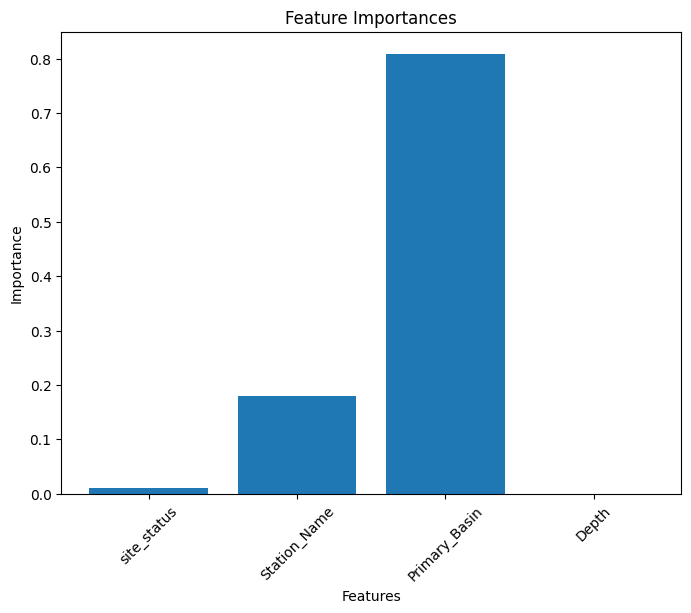

In [ ]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

- The feature importance of best model can be observed and canbe seen that primary basin seem to be the feature with utmost importance followed by station_name.

The model's feature importances are as follows:

1. Primary_Basin: The Primary_Basin feature has the highest importance score of approximately 0.809. This indicates that the basin in which the water monitoring station is located plays a crucial role in determining water quality, particularly pH levels. Different basins may have distinct geological and environmental characteristics that influence the water's chemical composition, leading to variations in pH levels.

2. Station_Name: The Station_Name feature has a notable importance score of around 0.181. This suggests that the specific location or station where the water samples are collected also plays a significant role in predicting pH and, consequently, water quality. Factors such as nearby human activities, industrial sites, or natural geological formations could influence pH levels.

3. site_status: The site_status feature has a modest importance score of approximately 0.0105. While it is less influential compared to Primary_Basin and Station_Name, it still contributes to the model's predictive capability. Site_status could refer to the classification of the monitoring site as rural or urban or some other relevant categorization.

4. Depth: The Depth feature has an importance score of 0.0, indicating that it does not contribute to the model's prediction. In this specific analysis, depth seems to have little to no effect on the pH values or water quality. It is possible that other factors have a more dominant influence on pH levels, rendering depth irrelevant for this particular model.

Overall, understanding these feature importances would help us to focus attention on the most critical variables when assessing pH levels and potential water quality issues.

In [ ]:
import pandas as pd

# Create a list of models
models = ['Linear Regression', 'Lasso Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression']

# Create a list of hyperparameters
hyperparameters = [
    '-',
    best_lasso_params,
    best_decision_tree_params,
    best_random_forest_params,
    best_gradient_boosting_params
]

# Create a list of evaluation metrics
mae_list = [
    linear_reg_mae,
    lasso_mae,
    decision_tree_mae,
    random_forest_mae,
    gradient_boosting_mae
]

mse_list = [
    linear_reg_mse,
    lasso_mse,
    decision_tree_mse,
    random_forest_mse,
    gradient_boosting_mse
]

rmse_list = [
    linear_reg_rmse,
    lasso_rmse,
    decision_tree_rmse,
    random_forest_rmse,
    gradient_boosting_rmse
]

# Create the DataFrame
df = pd.DataFrame({
    'Model': models,
    'Hyperparameters': hyperparameters,
    'MAE': mae_list,
    'MSE': mse_list,
    'RMSE': rmse_list
})


In [ ]:
(df.Hyperparameters).to_list()

['-',
 {'alpha': 0.1},
 {'max_depth': None, 'min_samples_split': 5},
 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}]

In [ ]:
df

,Model,Hyperparameters,MAE,MSE,RMSE
0,Linear Regression,-,0.296680,0.164824,0.405985
1,Lasso Regression,{'alpha': 0.1},0.297746,0.165632,0.406979
2,Decision Tree Regression,"{'max_depth': None, 'min_samples_split': 5}",0.214466,0.088638,0.297722
3,Random Forest Regression,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.214493,0.088634,0.297714
4,Gradient Boosting Regression,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.214484,0.088630,0.297708


In [ ]:
import pickle
pickle.dump(gradient_boosting_reg, open('gb_model_water_quality.pkl', 'wb'))

In [ ]:
import pickle
pickle.dump(best_random_forest, open('rf_model_water_quality.pkl', 'wb'))

In [ ]:
li = best_random_forest.predict(X_test)

In [ ]:
indexes_less_than_six = np.where(li < 6)[0]
rows_with_values_less_than_six = X_test.iloc[indexes_less_than_six]
rows_with_values_less_than_six.head(3)

,site_status,Station_Name,Primary_Basin,Depth
4157,3,277,19,0
4159,3,277,19,0
4232,3,277,19,0


In [ ]:

# Inverse transform to get original values
rows_with_values_less_than_six['site_status'] = label_encoder_site_status.inverse_transform(rows_with_values_less_than_six['site_status'])
rows_with_values_less_than_six['Station_Name'] = label_encoder_station_name.inverse_transform(rows_with_values_less_than_six['Station_Name'])
rows_with_values_less_than_six['Primary_Basin'] = label_encoder_primary_basin.inverse_transform(rows_with_values_less_than_six['Primary_Basin'])

In [ ]:
rows_with_values_less_than_six.head(3)

,site_status,Station_Name,Primary_Basin,Depth
4157,Bannagh,CROAGH BURN AT CROAGH,Derg,0
4159,Bannagh,CROAGH BURN AT CROAGH,Derg,0
4232,Bannagh,CROAGH BURN AT CROAGH,Derg,0


In [ ]:
best_random_forest.predict(X_test)

array([7.57603086, 7.9023268 , 6.94605114, ..., 7.92734224, 7.74340959,
       7.90152631])